In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Food_Data.csv")
df.head(2)

,Unnamed: 0,Meal_id,Name,Catagory,Description,Veg_non,Nutrient,Diet,Diabeties,Heart_Disease,Hypertension,Low_Pressure
0,0,meal_id1,summer squash salad ...,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,fiber,alkaline_diet low_fat_diet ketogenic_diet low_...,1,0,1,0
1,1,meal_id2,chicken minced salad ...,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,fiber,low_fat_diet low_carb_diet ketogenic_diet low_...,0,0,1,0


In [3]:
df.drop(["Unnamed: 0","Meal_id","Nutrient","Diet"],inplace=True ,axis=1)
df.head(2)

,Name,Catagory,Description,Veg_non,Diabeties,Heart_Disease,Hypertension,Low_Pressure
0,summer squash salad ...,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,1,0,1,0
1,chicken minced salad ...,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,0,0,1,0


In [4]:
df.insert(0, 'id', df.index)
df.head(5)

,id,Name,Catagory,Description,Veg_non,Diabeties,Heart_Disease,Hypertension,Low_Pressure
0,0,summer squash salad ...,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,1,0,1,0
1,1,chicken minced salad ...,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,0,0,1,0
2,2,sweet chilli almonds ...,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,0,1,1,0
3,3,tricolour salad ...,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",veg,0,0,1,0
4,4,chocolate nero cookies ...,cookie,"almonds, eggs, granulated sugar, bittersweet c...",veg,0,1,1,0


In [5]:
df.duplicated().sum()

0

In [6]:
from sklearn.preprocessing import LabelEncoder

# Sample categorical data

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
df['Veg_non'] = encoder.fit_transform(df['Veg_non'])
df.head(5)

,id,Name,Catagory,Description,Veg_non,Diabeties,Heart_Disease,Hypertension,Low_Pressure
0,0,summer squash salad ...,salad,"white balsamic vinegar, lemon juice, lemon rin...",1,1,0,1,0
1,1,chicken minced salad ...,salad,"olive oil, chicken mince, garlic (minced), oni...",0,0,0,1,0
2,2,sweet chilli almonds ...,chilli,"almonds whole, egg white, curry leaves, salt, ...",1,0,1,1,0
3,3,tricolour salad ...,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",1,0,0,1,0
4,4,chocolate nero cookies ...,cookie,"almonds, eggs, granulated sugar, bittersweet c...",1,0,1,1,0


In [7]:
# delete Low_Pressure 
df.drop(["Low_Pressure"],inplace=True ,axis=1)

In [8]:
# Calculate min and max
min_value = np.min(df['id'])
max_value = np.max(df['id'])

# Standardize the data
normalized_data = (df['id'] - min_value) / (max_value - min_value)
df['id']=normalized_data


In [9]:
df1 = df[["id","Diabeties","Heart_Disease","Hypertension"]]
df1.head(2)

,id,Diabeties,Heart_Disease,Hypertension
0,0.000000,1,0,1
1,0.003185,0,0,1


In [10]:
df2 = df[["id","Name","Catagory","Description","Veg_non"]]
df2.head(2)

,id,Name,Catagory,Description,Veg_non
0,0.000000,summer squash salad ...,salad,"white balsamic vinegar, lemon juice, lemon rin...",1
1,0.003185,chicken minced salad ...,salad,"olive oil, chicken mince, garlic (minced), oni...",0


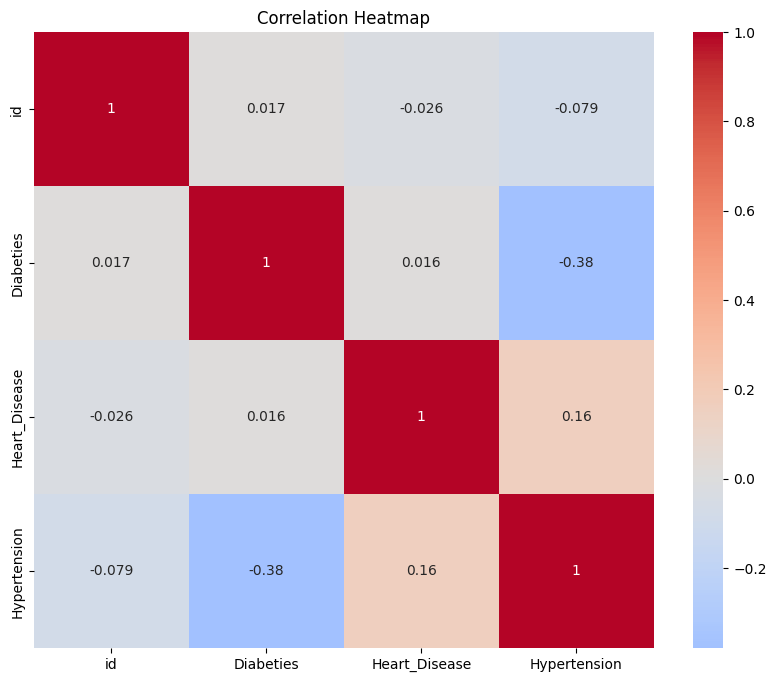

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0) # annot (numbers)

plt.title('Correlation Heatmap')
plt.show()

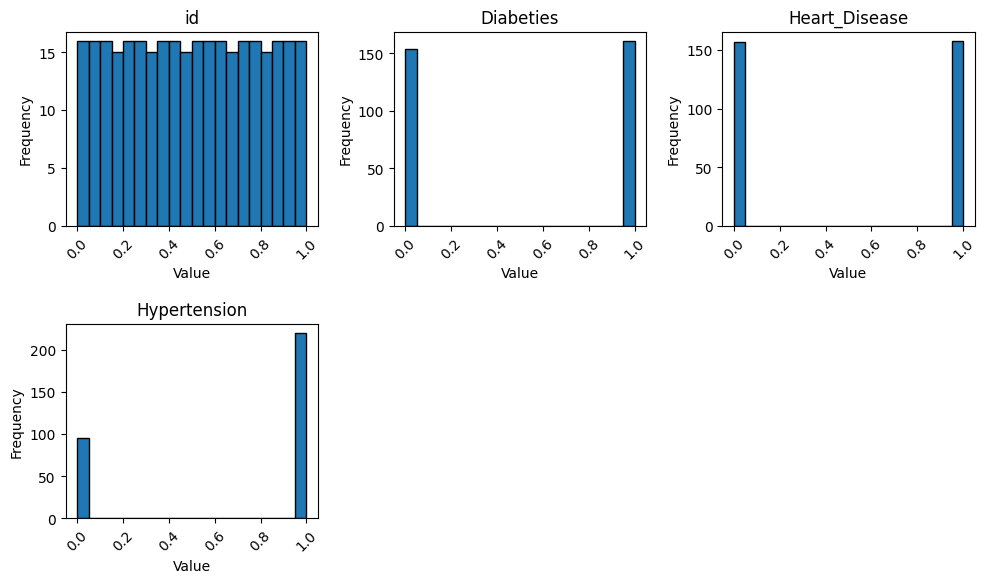

In [12]:

# Assuming df is your DataFrame
num_columns = len(df1.columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))

fig.subplots_adjust(hspace=1)  # Adjust vertical spacing between subplots

# Iterate over each column in the DataFrame
for i, column in enumerate(df1.columns):
    # Calculate the row and column indices for subplot placement
    row_idx = i // 3
    col_idx = i % 3

    # Access the subplot at the current row and column indices
    ax = axes[row_idx, col_idx]

    # Plot a histogram for the current column

    # bins=20: Specifies the number of bins (intervals) columns to divide the data range into.
    # k stands for black
    ax.hist(df1[column], bins=20, edgecolor='k')  # Create a histogram
    ax.set_title(f'{column}')  # Set the title to the column name
    ax.set_xlabel('Value')  # Set the x-axis label
    ax.set_ylabel('Frequency')  # Set the y-axis label

    # Adjust x-axis label rotation for better visibility
    ax.tick_params(axis='x', rotation=45)

# This loop iterates through all columns and creates histograms in a grid
# with specified subplot placement. Titles, labels, and axis rotation are adjusted for better readability.


# Hide any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<Axes: >

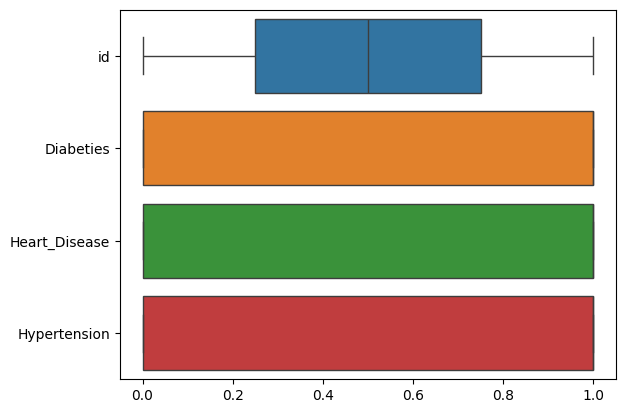

In [13]:
# Data distribution
# These plots display the distribution, median, quartiles, and potential outliers of the data.
sns.boxplot(data=df1, orient="h")

# Call all libraries of the model 

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
# Plot the elbow method graph
import matplotlib.pyplot as plt

c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

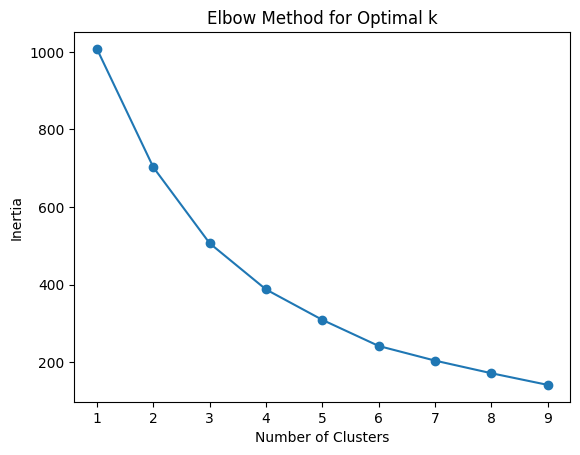

In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Split the data into training and testing sets
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


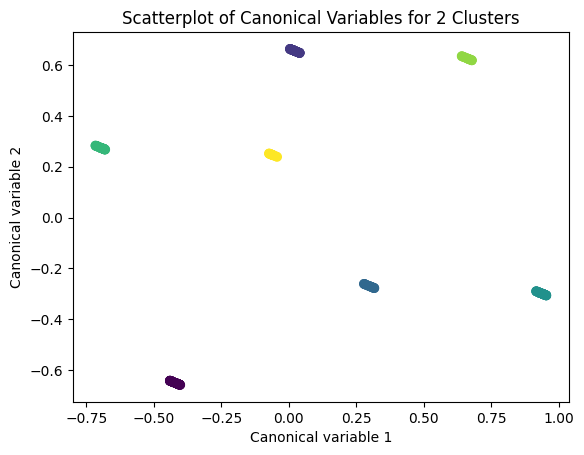

In [16]:
#copy df1 in dfn
dfn = df1

# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(dfn)

pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(dfn)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()

In [17]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 7

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df1)

silhouette_avg = silhouette_score(df1, clusters)
print(f"Silhouette Score: {silhouette_avg}")
# Display the clustered dataset
print(df1.head())

Silhouette Score: 0.6965610053276797
         id  Diabeties  Heart_Disease  Hypertension
0  0.000000          1              0             1
1  0.003185          0              0             1
2  0.006369          0              1             1
3  0.009554          0              0             1
4  0.012739          0              1             1


c:\Users\Elewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
from collections import Counter

# Get counts for each cluster label
cluster_counts = Counter(clusters)

# Print the counts
print(f"Number of data points in each cluster:")
print(cluster_counts)

# (Optional) Print percentages
print(f"Percentage of data points in each cluster:")
for cluster, count in cluster_counts.items():
    percentage = count / len(df1) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")


Number of data points in each cluster:
Counter({3: 78, 0: 65, 2: 59, 1: 57, 6: 20, 5: 19, 4: 17})
Percentage of data points in each cluster:
Cluster 6: 6.35%
Cluster 3: 24.76%
Cluster 1: 18.10%
Cluster 2: 18.73%
Cluster 4: 5.40%
Cluster 0: 20.63%
Cluster 5: 6.03%


In [19]:
cluster_2_indices = np.where(clusters == 5)[0]
cluster_2_data = df1.iloc[cluster_2_indices]
cluster_2_data

,id,Diabeties,Heart_Disease,Hypertension
52,0.165605,0,1,0
53,0.168790,0,1,0
71,0.226115,0,1,0
72,0.229299,0,1,0
74,0.235669,0,1,0
77,0.245223,0,1,0
130,0.414013,0,1,0
136,0.433121,0,1,0
141,0.449045,0,1,0
144,0.458599,0,1,0


In [20]:
import joblib

# Save the KMeans model to a file
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [21]:
# import joblib
# # Load the model from the file
# loaded_model = joblib.load("kmeans_model.pkl")

# # Use the loaded model for prediction
# predictions = loaded_model.predict(new_data)